# Plot and process behavioral data CuedMEM
by Willem Huijbers

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

In [126]:
#load in data from csf
os.getcwd()
fp = '/Users/huijbers/Dropbox/SideProjects/Project_with_Sander_cueMEM/cuedMEM/cuedMEM_SubjectLevelData.csv'
data_behav = pd.read_csv(fp)
data_behav.head

<bound method NDFrame.head of     SubjID  cue   HI  MI   FA   CR        rt_HI        rt_MI        rt_FA  \
0     1-JA  new   37  28   86  121   920.432432   983.928571   981.453488   
1     2-RR  new   60  10  121   86   803.466667  1034.000000   902.404959   
2     4-IT  new   23  32   52   98   840.956522   976.250000   984.596154   
3     6-EB  new   43  26   44  171   906.348837   914.576923   966.659091   
4     7-KN  new   42  30   49  166   841.452381   748.733333   881.020408   
5     8-EH  new   44  27   85  128   757.750000   730.333333   750.541177   
6     9-LE  new   43  29   77  136   836.395349   868.241379   845.038961   
7    10-MP  new   37  33   47  167   965.864865   982.454545  1013.085106   
8    11-IS  new   36  34   53  160   886.722222   812.764706   888.811321   
9    12-LJ  new   53  18   72  142   770.037736   864.777778   831.583333   
10   13-WW  new   53  16   83  118   945.981132  1115.500000  1042.072289   
11   14-EV  new   41  29   58  146  1038.56097

##### Scatter plot of (mean) behavior: dprime x bias

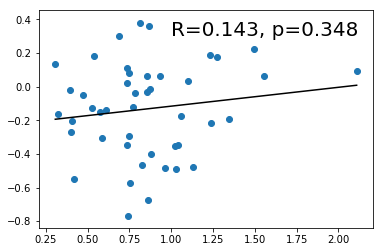

In [10]:
mean_behav = data_behav.groupby('SubjID').mean()
plt.scatter(mean_behav['dprime'], mean_behav['bias'])
z = np.polyfit(mean_behav['dprime'],mean_behav['bias'], 1)
p = np.poly1d(z)
plt.plot(sorted(mean_behav['dprime']),p(sorted(mean_behav['dprime'])),"black")
#plt.text(1, 0.3, 'y =%.3fx + %.3f'%(z[0],z[1]), fontsize=20,color='black')
r,pvalue = pearsonr(mean_behav['dprime'],mean_behav['bias'])
plt.text(1, 0.3, 'R=%.3f, p=%.3f'%(r,pvalue), fontsize=20,color='black')
plt.show()

In [94]:
#How to calculate dprime and bias 
from scipy.stats import norm
from math import exp,sqrt
Z = norm.ppf
 
def dPrime(hits, misses, fas, crs):
    # Floors an ceilings are replaced by half hits and half FA's
    halfHit = 0.5/(hits+misses)
    halfFa = 0.5/(fas+crs)
 
    # Calculate hitrate and avoid d' infinity
    hitRate = hits/(hits+misses)
    if hitRate == 1: hitRate = 1-halfHit
    if hitRate == 0: hitRate = halfHit
 
    # Calculate false alarm rate and avoid d' infinity
    faRate = fas/(fas+crs)
    if faRate == 1: faRate = 1-halfFa
    if faRate == 0: faRate = halfFa
 
    # Return d', beta, c and Ad'
    #out = {}
    #out['d'] = Z(hitRate) - Z(faRate)
    #out['beta'] = exp((Z(faRate)**2 - Z(hitRate)**2)/2)
    #out['c'] = -(Z(hitRate) + Z(faRate))/2
    #out['Ad'] = norm.cdf(out['d']/sqrt(2))
    d = Z(hitRate) - Z(faRate)
    c = -(Z(hitRate) + Z(faRate))/2
    return d,c

In [95]:
dPrime(data_behav['HI'][1], data_behav['MI'][1], data_behav['FA'][1], data_behav['CR'][1])

(0.8540460147925828, -0.64054751648184982)

In [123]:
dprime = []; bias = []
for ii in range(0, len(data_behav)):
    d,c = dPrime(data_behav['HI'][ii], data_behav['MI'][ii], data_behav['FA'][ii], data_behav['CR'][ii])
    dprime.append(d); bias.append(c)
    
data_behav["dprime2"] = dprime
data_behav["bias2"] = bias

In [124]:
data_behav.head(4)

,SubjID,cue,HI,MI,FA,CR,rt_HI,rt_MI,rt_FA,rt_CR,dprime,bias,dprime2,bias2
0,1-JA,new,37,28,86,121,920.432432,983.928571,981.453488,1002.950413,0.387941,0.019554,0.387941,0.019554
1,2-RR,new,60,10,121,86,803.466667,1034.000000,902.404959,960.732558,0.854046,-0.640548,0.854046,-0.640548
2,4-IT,new,23,32,52,98,840.956522,976.250000,984.596154,919.989796,0.187789,0.300441,0.187789,0.300441
3,6-EB,new,43,26,44,171,906.348837,914.576923,966.659091,893.871345,1.138988,0.255628,1.138988,0.255628


In [120]:
data_behav.head()

,SubjID,cue,HI,MI,FA,CR,rt_HI,rt_MI,rt_FA,rt_CR,dprime,bias,dprime2
0,1-JA,new,37,28,86,121,920.432432,983.928571,981.453488,1002.950413,0.387941,0.019554,0.387941
1,2-RR,new,60,10,121,86,803.466667,1034.000000,902.404959,960.732558,0.854046,-0.640548,0.854046
2,4-IT,new,23,32,52,98,840.956522,976.250000,984.596154,919.989796,0.187789,0.300441,0.187789
3,6-EB,new,43,26,44,171,906.348837,914.576923,966.659091,893.871345,1.138988,0.255628,1.138988
4,7-KN,new,42,30,49,166,841.452381,748.733333,881.020408,813.644578,0.956186,0.267665,0.956186
